In [1]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
import matplotlib.cm as cm
import seaborn as sns
sns.set_style("dark")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import mlrose_hiive

# Models
from sklearn import tree
from sklearn.neural_network import MLPClassifier

from utils import learning_curve_plotter, model_param_curve, metrics

In [2]:
# base param
seed = 712

In [18]:
# Load Dataset

diabet_path = "./data/diabetes.csv"
df_diabet = pd.read_csv(diabet_path)

# EDA

In [24]:
df_diabet.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Outcome
0          500
1          268
dtype: int64


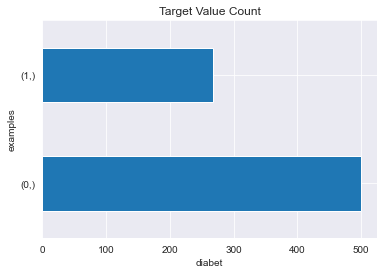

In [19]:
# visualize target value

target_cnt = df_diabet[["Outcome"]].value_counts()
print(target_cnt)

target_cnt.plot(kind='barh', title="Target Value Count")
plt.xlabel("diabet")
plt.ylabel("examples")
plt.grid()
plt.show()

In [20]:
target_cnt / len(df_diabet)

Outcome
0          0.651042
1          0.348958
dtype: float64

In [73]:
target = 'Outcome'
features = [ 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

train_df, test_df = train_test_split(df_diabet, test_size=0.2, random_state=712)
X_train_origin, y_train = train_df[features], train_df[target]
X_test_origin, y_test = test_df[features], test_df[target]

In [74]:
# data normalize
sc = StandardScaler()
sc.fit(X_train_origin)

X_train = sc.transform(X_train_origin)
X_test = sc.transform(X_test_origin)

# for i in range(X_train.shape[1]):
#     print(f"Range after normalize feature {i}'s {min(X_train_origin[:, i])} ~ {max(X_train_origin[:, i])} to {min(X_train[:, i])} ~ {max(X_train[:, i])}")

## Neural Network

In [83]:
#Backprob

selected_algorithm=['gradient_descent', "random_hill_climb", "simulated_annealing", "genetic_alg"]

results = []

for algo in selected_algorithm:
    for step in range(1, 2001, 50):
        start_time = time.time()
        clf = mlrose_hiive.NeuralNetwork(hidden_nodes=[10], algorithm=algo,
                                                  early_stopping=True, max_iters=step, random_state=seed,
                                                  curve=True, max_attempts=100, learning_rate=0.01, activation="tanh"
                                             )
        model = clf.fit(X_train, y_train)
        end_time = time.time()
        duration = end_time - start_time
        y_tr_pred = clf.predict(X_train)
        tr_acc = accuracy_score(y_train, y_tr_pred)
        y_test_pred = clf.predict(X_test)
        test_acc = accuracy_score(y_test, y_test_pred)

        f1 = f1_score(y_test, y_test_pred)    

        results.append([step, algo, duration, tr_acc, test_acc, f1])
        print(f"{algo}: {step} - duration: {duration}, tr_acc: {tr_acc}, test_acc: {test_acc}, f1: {f1}")

df = pd.DataFrame(results, columns=["steps", "algo", "duration", "train_acc", "test_accuracy", "f1_score"])
df.to_csv("optimization_result.csv", index=False)

gradient_descent: 1 - duration: 0.0054399967193603516, tr_acc: 0.7133550488599348, test_acc: 0.7272727272727273, f1: 0.5
gradient_descent: 51 - duration: 0.06749987602233887, tr_acc: 0.7931596091205212, test_acc: 0.7597402597402597, f1: 0.6262626262626262
gradient_descent: 101 - duration: 0.12499308586120605, tr_acc: 0.8061889250814332, test_acc: 0.7402597402597403, f1: 0.6226415094339622
gradient_descent: 151 - duration: 0.18862104415893555, tr_acc: 0.8045602605863192, test_acc: 0.7402597402597403, f1: 0.6226415094339622
gradient_descent: 201 - duration: 0.2511632442474365, tr_acc: 0.8110749185667753, test_acc: 0.7727272727272727, f1: 0.6534653465346535
gradient_descent: 251 - duration: 0.3104078769683838, tr_acc: 0.8224755700325733, test_acc: 0.7272727272727273, f1: 0.5961538461538461
gradient_descent: 301 - duration: 0.38069725036621094, tr_acc: 0.8208469055374593, test_acc: 0.7337662337662337, f1: 0.594059405940594
gradient_descent: 351 - duration: 0.43505001068115234, tr_acc: 0.81

random_hill_climb: 1051 - duration: 0.9236726760864258, tr_acc: 0.495114006514658, test_acc: 0.5194805194805194, f1: 0.5256410256410257
random_hill_climb: 1101 - duration: 0.9879541397094727, tr_acc: 0.501628664495114, test_acc: 0.538961038961039, f1: 0.5359477124183006
random_hill_climb: 1151 - duration: 1.036984920501709, tr_acc: 0.511400651465798, test_acc: 0.5454545454545454, f1: 0.5394736842105263
random_hill_climb: 1201 - duration: 1.1011271476745605, tr_acc: 0.5162866449511401, test_acc: 0.564935064935065, f1: 0.5503355704697986
random_hill_climb: 1251 - duration: 1.1458549499511719, tr_acc: 0.5244299674267101, test_acc: 0.577922077922078, f1: 0.5578231292517007
random_hill_climb: 1301 - duration: 1.1700432300567627, tr_acc: 0.5309446254071661, test_acc: 0.577922077922078, f1: 0.5578231292517007
random_hill_climb: 1351 - duration: 1.2049338817596436, tr_acc: 0.5342019543973942, test_acc: 0.5844155844155844, f1: 0.5616438356164384
random_hill_climb: 1401 - duration: 1.23313307762

genetic_alg: 51 - duration: 5.980211973190308, tr_acc: 0.7850162866449512, test_acc: 0.7402597402597403, f1: 0.607843137254902
genetic_alg: 101 - duration: 12.048986911773682, tr_acc: 0.7899022801302932, test_acc: 0.6948051948051948, f1: 0.5765765765765765
genetic_alg: 151 - duration: 18.25527596473694, tr_acc: 0.7980456026058632, test_acc: 0.7467532467532467, f1: 0.6213592233009709
genetic_alg: 201 - duration: 23.38088893890381, tr_acc: 0.7980456026058632, test_acc: 0.7467532467532467, f1: 0.6213592233009709
genetic_alg: 251 - duration: 27.622260093688965, tr_acc: 0.7980456026058632, test_acc: 0.7467532467532467, f1: 0.6213592233009709
genetic_alg: 301 - duration: 27.331212043762207, tr_acc: 0.7980456026058632, test_acc: 0.7467532467532467, f1: 0.6213592233009709
genetic_alg: 351 - duration: 27.43980383872986, tr_acc: 0.7980456026058632, test_acc: 0.7467532467532467, f1: 0.6213592233009709
genetic_alg: 401 - duration: 27.08780002593994, tr_acc: 0.7980456026058632, test_acc: 0.74675324

In [121]:
df.head()

,steps,algo,duration,train_acc,test_accuracy,f1_score
0,1,gradient_descent,0.005440,0.713355,0.727273,0.500000
1,51,gradient_descent,0.067500,0.793160,0.759740,0.626263
2,101,gradient_descent,0.124993,0.806189,0.740260,0.622642
3,151,gradient_descent,0.188621,0.804560,0.740260,0.622642
4,201,gradient_descent,0.251163,0.811075,0.772727,0.653465


In [159]:
def plotting_algo(algo_name, color="g", save_abb="test"):
    print(f"compare algorith with {algo_name}")
    grad_descent = df[df.algo == "gradient_descent"]
    iters = grad_descent["steps"]
    grad_f1 = grad_descent["f1_score"]
    grad_time = grad_descent["duration"]
    
    new_algo = df[df.algo == algo_name]
    new_algo_f1 = new_algo["f1_score"]
    new_algo_time = new_algo["duration"]

    plt.plot(iters, grad_f1, label="backpropagation", color="b")
    plt.plot(iters, new_algo_f1, label=algo_name, color=color)
    plt.grid()
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("F1")
    plt.savefig(f"{save_abb}_f1.png")
    plt.close()

    plt.plot(iters, grad_time, label="backpropagation", color="b")
    plt.plot(iters, rhc_time, label=algo_name, color=color)
    plt.grid()
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Time (ms)")
    plt.savefig(f"{save_abb}_duration.png")    
    plt.close()

In [162]:
plotting_algo(selected_algorithm[1], color="g", save_abb="rhc")
plotting_algo(selected_algorithm[2], color="r", save_abb="sa")
plotting_algo(selected_algorithm[3], color="y", save_abb="ghc")

compare algorith with random_hill_climb
compare algorith with simulated_annealing
compare algorith with genetic_alg


In [158]:
selected_algorithm

['gradient_descent', 'random_hill_climb', 'simulated_annealing', 'genetic_alg']

In [165]:
def plotting_algo_total(algo_list):
    grad_descent = df[df.algo == "gradient_descent"]
    iters = grad_descent["steps"]
    grad_f1 = grad_descent["f1_score"]
    grad_time = grad_descent["duration"]

    rhc = df[df.algo == algo_list[1]]
    rhc_f1 = rhc["f1_score"]
    rhc_time = rhc["duration"]
    
    sa = df[df.algo == algo_list[2]]
    sa_f1 = sa["f1_score"]
    sa_time = sa["duration"]
    
    ga = df[df.algo == algo_list[3]]
    ga_f1 = ga["f1_score"]
    ga_time = ga["duration"]

    plt.plot(iters, grad_f1, label="backpropagation", color="b")
    plt.plot(iters, rhc_f1, label=algo_list[1], color="g")
    plt.plot(iters, sa_f1, label=algo_list[2], color="r")
    plt.plot(iters, ga_f1, label=algo_list[3], color="y")
    plt.grid()
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("F1")
    plt.savefig(f"total_f1.png")
    plt.close()

    plt.plot(iters, grad_time, label="backpropagation", color="C1")
    plt.plot(iters, rhc_time, label=algo_list[1], color="g")
    plt.plot(iters, sa_time, label=algo_list[2], color="r")
    plt.plot(iters, ga_time, label=algo_list[3], color="y")
    plt.grid()
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Time (ms)")
    plt.savefig(f"total_duration.png")    
    plt.close()

In [166]:
plotting_algo_total(selected_algorithm)